Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

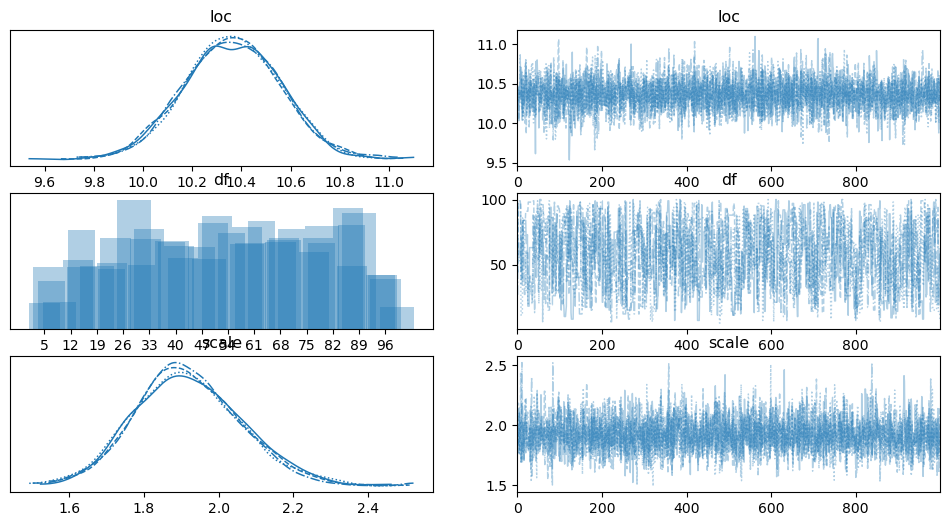

In [21]:
## Question 1
n,loc_true,scale_true,df_true = 100,10,2,15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
with pm.Model() as t_norm_half_norm_discrete:   
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale=pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1,upper=100)
    x_obs = pm.StudentT("likelihood", mu=loc,sigma=scale,nu=df,observed=x)
with t_norm_half_norm_discrete:
    idata = pm.sample()
import arviz as az
az.plot_trace(idata)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

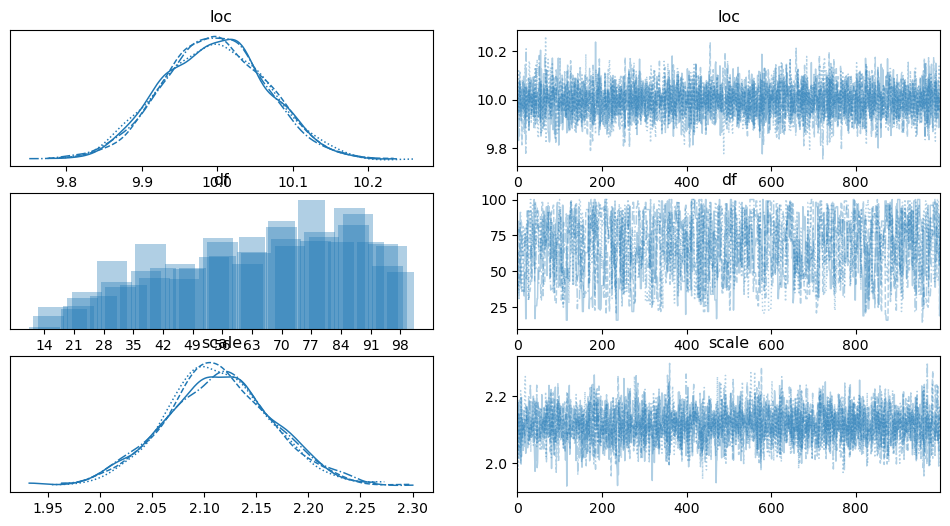

In [24]:
import pymc as pm
from scipy import stats
n,loc_true,scale_true,df_true = 1000,10,2,15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
with pm.Model() as t_norm_half_norm_discrete:
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale=pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1,upper=100)
    x_obs = pm.StudentT("likelihood", mu=loc,sigma=scale,nu=df,observed=x)
    idata = pm.sample()
import arviz as az
az.plot_trace(idata)

In [8]:
## Question 2

import numpy as np
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])
import pymc as pm

with pm.Model() as Centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [9]:
SEED = [20100420, 20134234]
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [10]:
import logging
_log = logging.getLogger("pymc")
_log.setLevel(logging.INFO)

In [11]:
with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: >

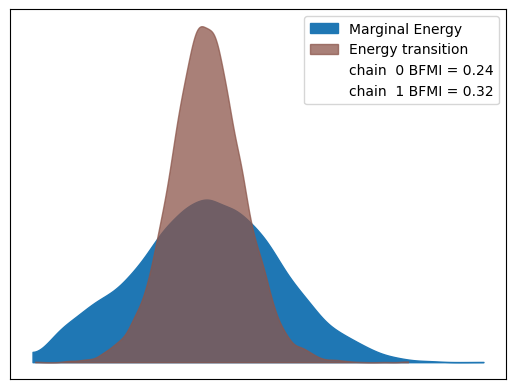

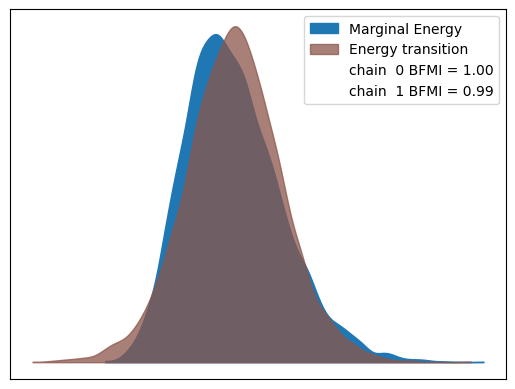

In [12]:
import arviz as az
az.plot_energy(fit_C)
az.plot_energy(fit_NC)